# Assignment 4- Data Wrangling Process
## GGE6505/GGE5405 Introduction to Big Data and Data Science
### GROUP 9

Data Wrangling is the process of gathering, collecting, and transforming Raw data into
another format for better understanding, decision-making, accessing, and analysis in less
time. Data Wrangling is also known as Data Munging.

In this assignment, you will learn how to explore and clean a dataset. Following the class notes
each group needs to perform the following actions on their assigned dataset:

#### Data Exploration and visualization:
* Explain the data. Find the features in the dataset. Print their names and dimensions.
* Plot the data distribution of a few features. Discuss about their mean and variance.

#### Data Pre-processing:
* Data cleaning: Find missing data. Remove them and justify your choice.
* Data Cleaning: Identify noise in the data. How did you identify the noise? Justify and demonstrate the technique you would use to reduce noise.
* Data transformations: Perform standardizations and normalization. Justify your chosen normalization method.
* Any other techniques which are required for your dataset such as adding data head

### The dataset used for this anlaysis is the Exasens Data Set downloaded from the UCI machine Learning directory https://archive.ics.uci.edu/ml/datasets/Exasens


# Data Set Information:

The Exasens dataset includes demographic information on 4 groups of saliva samples (COPD-Asthma-Infected-HC) collected in the frame of a joint research project, Exasens ([Web Link]), at the Research Center Borstel, BioMaterialBank Nord (Borstel, Germany). The sampling procedure of the patient materials was approved by the local ethics committee of the University of Luebeck under the approval number AZ-16-167 and a written informed consent was obtained from all subjects. A permittivity biosensor, developed at IHP Microelectronics (Frankfurt Oder, Germany), was used for the dielectric characterization of the saliva samples for classification purposes ([Web Link]).

Definition of 4 sample groups included within the Exasens dataset:

(I) Outpatients and hospitalized patients with COPD without acute respiratory infection (COPD).

(II) Outpatients and hospitalized patients with asthma without acute respiratory infections (Asthma).

(III) Patients with respiratory infections, but without COPD or asthma (Infected).

(IV) Healthy controls without COPD, asthma, or any respiratory infection (HC).


##### Attribute Information:

1- Diagnosis (COPD-HC-Asthma-Infected)

2- ID

3- Age

4- Gender (1=male, 0=female)

5- Smoking Status (1=Non-smoker, 2=Ex-smoker, 3=Active-smoker)

6- Saliva Permittivity:

a) Imaginary part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)

b) Real part (Min(Î”)=Absolute minimum value, Avg.(Î”)=Average)

In [127]:
# import the required libary
import numpy as np
import pandas as pd # Data Analysis
import scipy.stats as stats # Data analysis and stastistics library
import sklearn
import matplotlib.pyplot as plt # Visualization library
import seaborn as sns  # Visualization library


# Change all charts style
plt.style.use('seaborn')

In [2]:
## Load the data
data = pd.read_csv('Exasens.csv')
data.head()

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3


## Data Pre-processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diagnosis       399 non-null    object 
 1   ID              399 non-null    object 
 2   Imaginary Part  101 non-null    object 
 3   Unnamed: 3      101 non-null    object 
 4   Real Part       101 non-null    object 
 5   Unnamed: 5      101 non-null    object 
 6   Gender          399 non-null    float64
 7   Age             399 non-null    float64
 8   Smoking         399 non-null    float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
 11  Unnamed: 11     3 non-null      object 
 12  Unnamed: 12     4 non-null      object 
dtypes: float64(5), object(8)
memory usage: 40.9+ KB


In [4]:
#print the name all the columns
data.columns

Index(['Diagnosis', 'ID', 'Imaginary Part', 'Unnamed: 3', 'Real Part',
       'Unnamed: 5', 'Gender', 'Age', 'Smoking', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

### Data cleaning

* We can see from the names printed above that from unamaed:9 to unamed:12 columns needs to be dropped because they are not part of the features of the dataset according to the information gotten from the dataset, so we need to  drop them

* From the dataset information, the Imaginary part contains the min and averge imagenary part, while the Real part contains the min and the averge real part,so we'll aslo drop the first two rows in the data.

* Then we will also rename all the columns too and reset index

In [5]:
data = data.iloc[2:,:9]# select only the useful columns and rows
data

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
5,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
6,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0
...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0


In [6]:
## rename all the coulumns name
label_names = ['Diagnosis','ID','Imaginary_part_(min)','Imaginary_part_(avg)', 'Real_part_(min)','Real_part_(avg)',
              'Gender', 'Age','Smoking']
data.columns = label_names
data

,Diagnosis,ID,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
5,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
6,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0
...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0


In [8]:
# print the names of all the features
data.columns

Index(['Diagnosis', 'ID', 'Imaginary_part_(min)', 'Imaginary_part_(avg)',
       'Real_part_(min)', 'Real_part_(avg)', 'Gender', 'Age', 'Smoking'],
      dtype='object')

* Dealing with missing values

In [9]:
# getting the total sum of missing values of each fatures
data.isnull().sum()

Diagnosis                 0
ID                        0
Imaginary_part_(min)    299
Imaginary_part_(avg)    299
Real_part_(min)         299
Real_part_(avg)         299
Gender                    0
Age                       0
Smoking                   0
dtype: int64

Looking at the amount size of the missing data removing it will reduce the size of our data, which could affect our analysis, because our dataset is an health analysis data so formulate data can also negatively influence our analysis;

* The result of the imagery part and real part dose not depend on age since its a medical test, so if will try to manipulate the data or compute mean to fill in the missing value,there will be a huge biasness in our analysis results.

In [10]:
# chceking the distirbution of diagnosis to dectect missing mising value
data.groupby(['Diagnosis']).count()

,ID,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking
Diagnosis,,,,,,,,
Asthma,80,10,10,10,10,80,80,80
COPD,79,40,40,40,40,79,79,79
HC,160,40,40,40,40,160,160,160
Infected,80,10,10,10,10,80,80,80


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 375
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             100 non-null    object 
 1   ID                    100 non-null    object 
 2   Imaginary_part_(min)  100 non-null    object 
 3   Imaginary_part_(avg)  100 non-null    object 
 4   Real_part_(min)       100 non-null    object 
 5   Real_part_(avg)       100 non-null    object 
 6   Gender                100 non-null    float64
 7   Age                   100 non-null    float64
 8   Smoking               100 non-null    float64
dtypes: float64(3), object(6)
memory usage: 7.8+ KB


* Both the imaginery and the Real part data are both an object data, we'll try to convert them to Float (astype(float))
* remove the negative signs too using the absolute function abs()

In [26]:
data['Imaginary_part_(min)']=data['Imaginary_part_(min)'].astype(float).abs()
data['Imaginary_part_(avg)']=data['Imaginary_part_(avg)'].astype(float).abs()
data['Real_part_(min)']=data['Real_part_(min)'].astype(float).abs()
data['Real_part_(avg)']=data['Real_part_(avg)'].astype(float).abs()
data.head(5)

,Diagnosis,ID,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking
0,COPD,301-4,320.61,300.563531,495.26,464.171991,1.0,77.0,2.0
1,COPD,302-3,325.39,314.750360,473.73,469.263140,0.0,72.0,2.0
2,COPD,303-3,323.00,317.436056,476.12,471.897667,1.0,73.0,3.0
3,COPD,304-4,327.78,317.399670,473.73,468.856388,1.0,76.0,2.0
4,COPD,305-4,325.39,316.155785,478.52,472.869783,0.0,65.0,2.0


In [ ]:
# Reset the data Index back, since we drop the last two 
data.reset_index(level = None,inplace=True, drop=True)
data

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 375
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             100 non-null    object 
 1   ID                    100 non-null    object 
 2   Imaginary_part_(min)  100 non-null    float64
 3   Imaginary_part_(avg)  100 non-null    float64
 4   Real_part_(min)       100 non-null    float64
 5   Real_part_(avg)       100 non-null    float64
 6   Gender                100 non-null    float64
 7   Age                   100 non-null    float64
 8   Smoking               100 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.8+ KB


### Identifying Noise in Data

* I used differnt Visualization techniques to determine noise in my data, becuase noises and outlier can be easily idenfiied using visualization methods

In [66]:
data.describe()

,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,314.941800,304.779677,473.002200,458.701666,0.610000,52.060000,1.750000
std,28.422753,25.834316,49.009819,43.725345,0.490207,20.215416,0.672324
min,225.000000,225.000000,44.000000,44.000000,0.000000,17.000000,1.000000
25%,320.610000,305.072319,468.950000,462.804774,0.000000,33.750000,1.000000
50%,323.000000,314.327176,473.730000,467.136002,1.000000,53.000000,2.000000
75%,327.780000,318.476799,476.120000,470.036232,1.000000,71.000000,2.000000
max,337.350000,328.280985,626.860000,473.928698,1.000000,93.000000,3.000000


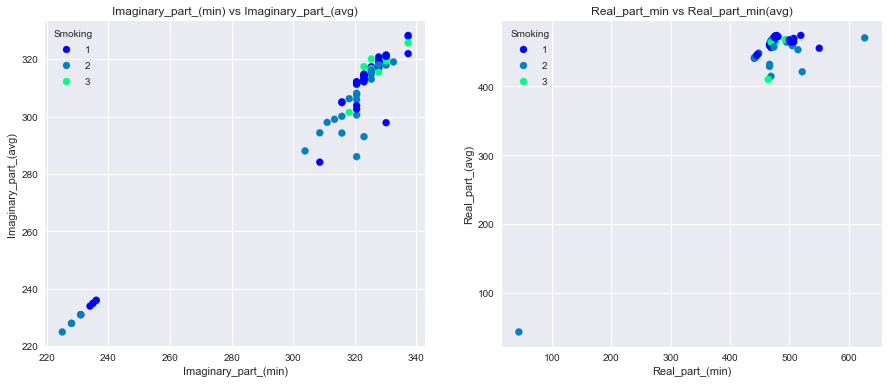

In [128]:
# Using scatterplot to visualize our data
fig, (ax, ax0) = plt.subplots(figsize =(15,6),
                      nrows =1,
                      ncols =2)

scatter = ax.scatter(x =data['Imaginary_part_(min)'],
           y= data['Imaginary_part_(avg)'],
            c = data['Smoking'],
           cmap= 'winter')
# Customise your chart
ax.set (title = "Imaginary_part_(min) vs Imaginary_part_(avg)",
       xlabel = "Imaginary_part_(min)",
       ylabel = "Imaginary_part_(avg)")

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Smoking")


scatter2 = ax0.scatter(x =data['Real_part_(min)'],
           y= data['Real_part_(avg)'],
            c = data['Smoking'],
           cmap= 'winter')
# Customise your chart
ax0.set (title = "Real_part_min vs Real_part_min(avg)",
       xlabel = "Real_part_(min)",
       ylabel = "Real_part_(avg)")

# Add a legend
ax0.legend(*scatter2.legend_elements(), title = "Smoking")
plt.show()

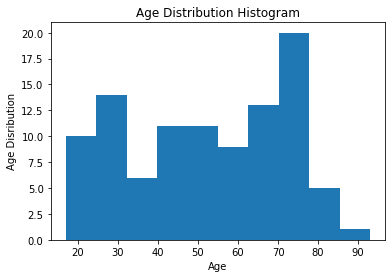

In [39]:
# plot age distibution using histogram
plt.hist(data['Age'])
plt.xlabel("Age")
plt.ylabel("Age Disribution")
plt.title("Age Distribution Histogram")
plt.show()

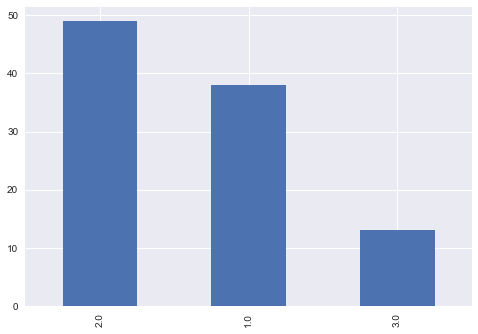

In [129]:
# check if their is any outliers or noise in the Smoking data
data.Smoking.value_counts().plot.bar();

### From our Data visualization above, we can see that, noise is only present in the Real_part dataset, whic can be seen the the scatter plot chat, at the lower left corner of the chart and also from the data.describe() formation result which shows that the lowest value is 44.000 and the 25th percentile is 462.804774, which is due to the noise prsent in the data.

In [57]:
bins = np.linspace(data['Real_part_(min)'].min(),data['Real_part_(min)'].max(),5)
bins

array([ 44.   , 189.715, 335.43 , 481.145, 626.86 ])

In [60]:
data['Real_part_(min)'].unique()

array([495.26, 473.73, 476.12, 478.52, 507.23, 471.34, 521.58, 466.55,
       468.95, 502.44, 442.  , 443.  , 504.83, 441.  , 514.4 , 519.19,
       626.86, 550.29, 492.87,  44.  , 445.  , 448.  , 447.  , 446.  ,
       464.16, 500.05, 480.91])

In [64]:
data['Real_part_(avg)'].unique()

array([464.1719907, 469.2631404, 471.8976667, 468.856388 , 472.8697828,
       469.0241943, 467.3618538, 470.1816328, 466.3786343, 466.13057  ,
       466.5250462, 463.1934272, 421.1894102, 428.9503667, 431.9906508,
       414.6756675, 468.8069765, 467.7786275, 442.       , 443.       ,
       464.3431669, 459.086955 , 465.8307169, 471.0419613, 469.5297246,
       441.       , 469.9877652, 468.3035496, 467.9347222, 472.5830747,
       464.8151111, 466.4463462, 471.7648889, 463.2120865, 463.7133737,
       464.9861141, 471.737103 , 467.1541667, 453.2254697, 473.9286981,
       465.4367023, 470.413137 , 464.8477558, 455.3339083, 469.5871885,
       471.2407847, 465.5598299, 467.3918418, 458.4269978, 467.8587217,
       462.1414882,  44.       , 464.5463644, 445.       , 461.1647584,
       461.0824463, 448.       , 447.       , 446.       , 464.4728215,
       468.5672198, 410.0670714, 470.9443434, 468.0027422, 467.977492 ,
       463.6404025, 469.2765507, 469.1655772, 469.5923529, 463.0

##  Only a single data point is identify as Noise in this data, so we'll just drop the data to avoid biasness in our data

## Z Score Normalization

In [134]:
# pefermoning Z score Normalization on the dataset using scipy libray
data_2 = data.select_dtypes(include='number').apply(stats.zscore)
data_2.head()

,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking
0,0.200429,-0.164022,0.456438,0.125737,0.799590,1.239927,0.373718
1,0.369452,0.387892,0.014925,0.242758,-1.250641,0.991345,0.373718
2,0.284941,0.492374,0.063936,0.303313,0.799590,1.041062,1.868588
3,0.453963,0.490958,0.014925,0.233409,0.799590,1.190211,0.373718
4,0.369452,0.442567,0.113153,0.325658,-1.250641,0.643330,0.373718


## One hot Enconding
One hot ecoding is needed when you wan to use your data to build a prediction model in machine learning, you need to convert each categroical data to binary (1 and 0) before it can be inputted into the model, since machine learning deals with numbers

In [135]:
data.head()

,Diagnosis,ID,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking
0,COPD,301-4,320.61,300.563531,495.26,464.171991,1.0,77.0,2.0
1,COPD,302-3,325.39,314.750360,473.73,469.263140,0.0,72.0,2.0
2,COPD,303-3,323.00,317.436056,476.12,471.897667,1.0,73.0,3.0
3,COPD,304-4,327.78,317.399670,473.73,468.856388,1.0,76.0,2.0
4,COPD,305-4,325.39,316.155785,478.52,472.869783,0.0,65.0,2.0


In [80]:
# using pandas for one hot enconder

dummies = pd.get_dummies(data[["Diagnosis",'Imaginary_part_(min)','Imaginary_part_(avg)',
                              'Real_part_(min)','Real_part_(avg)', 'Gender', 'Age','Smoking']])
dummies['ID'] = data['ID']
dummies.set_index('ID')

,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking,Diagnosis_Asthma,Diagnosis_COPD,Diagnosis_HC,Diagnosis_Infected
ID,,,,,,,,,,,
301-4,320.61,300.563531,495.26,464.171991,1.0,77.0,2.0,0,1,0,0
302-3,325.39,314.750360,473.73,469.263140,0.0,72.0,2.0,0,1,0,0
303-3,323.00,317.436056,476.12,471.897667,1.0,73.0,3.0,0,1,0,0
304-4,327.78,317.399670,473.73,468.856388,1.0,76.0,2.0,0,1,0,0
305-4,325.39,316.155785,478.52,472.869783,0.0,65.0,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
148-5,323.00,314.384434,476.12,472.103689,1.0,38.0,1.0,0,0,0,1
149-5,323.00,314.323628,476.12,472.395413,1.0,36.0,1.0,0,0,0,1
150-5,323.00,312.856656,480.91,472.294281,0.0,33.0,1.0,0,0,0,1


##  standardizations
The range of our features are different, even thought this data is till perfect for a normal modelling without standalization our alll our import features are within the same range (Real and Imaginary Part test), but we will performe standlization on this data to see how better the range of scale can befome.

* We used the Standardscaler class from sklearn libary to fit our data to a standard scaller object, for this to be possible we drop the non- numerical data in our data and we also perfome our standard caller after performing the one hot enconding so that all important features can be used

In [137]:
from sklearn import preprocessing

data_2 = dummies.drop('ID',axis = 1)
std_scale = preprocessing.StandardScaler().fit_transform(data_2)

scaled_data = pd.DataFrame(std_scale, columns=data_2.columns)

scaled_data.head()

,Imaginary_part_(min),Imaginary_part_(avg),Real_part_(min),Real_part_(avg),Gender,Age,Smoking,Diagnosis_Asthma,Diagnosis_COPD,Diagnosis_HC,Diagnosis_Infected
0,0.200429,-0.164022,0.456438,0.125737,0.799590,1.239927,0.373718,-0.333333,1.224745,-0.816497,-0.333333
1,0.369452,0.387892,0.014925,0.242758,-1.250641,0.991345,0.373718,-0.333333,1.224745,-0.816497,-0.333333
2,0.284941,0.492374,0.063936,0.303313,0.799590,1.041062,1.868588,-0.333333,1.224745,-0.816497,-0.333333
3,0.453963,0.490958,0.014925,0.233409,0.799590,1.190211,0.373718,-0.333333,1.224745,-0.816497,-0.333333
4,0.369452,0.442567,0.113153,0.325658,-1.250641,0.643330,0.373718,-0.333333,1.224745,-0.816497,-0.333333


In [138]:
np.mean(scaled_data)

Imaginary_part_(min)    1.811884e-15
Imaginary_part_(avg)   -6.294965e-16
Real_part_(min)        -1.474133e-15
Real_part_(avg)        -5.467848e-16
Gender                  1.154632e-16
Age                    -2.375877e-16
Smoking                 7.382983e-17
Diagnosis_Asthma        2.609024e-16
Diagnosis_COPD         -5.484502e-16
Diagnosis_HC            3.774758e-17
Diagnosis_Infected      3.819167e-16
dtype: float64

In [148]:
#The variance of the orignal data
np.var(dummies)

Imaginary_part_(min)     799.774341
Imaginary_part_(avg)     660.737758
Real_part_(min)         2377.942719
Real_part_(avg)         1892.786727
Gender                     0.237900
Age                      404.576400
Smoking                    0.447500
Diagnosis_Asthma           0.090000
Diagnosis_COPD             0.240000
Diagnosis_HC               0.240000
Diagnosis_Infected         0.090000
dtype: float64

In [149]:
# Variance of the scaled data
np.var(scaled_data)

Imaginary_part_(min)    1.0
Imaginary_part_(avg)    1.0
Real_part_(min)         1.0
Real_part_(avg)         1.0
Gender                  1.0
Age                     1.0
Smoking                 1.0
Diagnosis_Asthma        1.0
Diagnosis_COPD          1.0
Diagnosis_HC            1.0
Diagnosis_Infected      1.0
dtype: float64

* The data has been scaled down, the mean and vari

## Data Exploration and Visualization
We perform some minor visualization on our data to derive some insights.

Text(0, 0.5, 'Age')

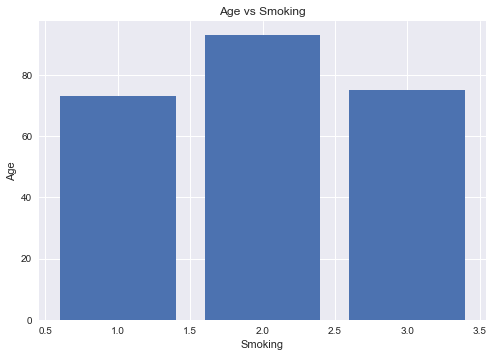

In [132]:
# Smokers Vs Age
plt.bar(data['Smoking'],data['Age'])

plt.title('Age vs Smoking')
plt.xlabel('Smoking')
plt.ylabel('Age')

E:\Workshop\Spatial Analysis\env\lib\site-packages\matplotlib\collections.py:1099: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


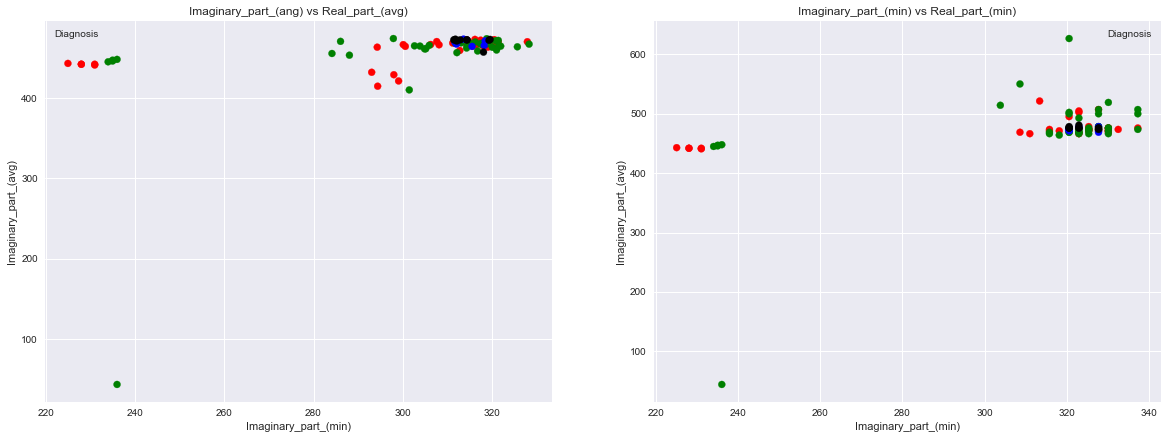

In [130]:
# visualisig Saliva Test and Diagnosis Results
colors = {'COPD':'red', 'HC':'green', 'Asthma':'blue', 'Infected':'black'}

fig,(ax, ax1) = plt.subplots(figsize =(20,7),
                     nrows=1, ncols=2)

scatter = ax.scatter(x =data['Imaginary_part_(avg)'],
           y= data['Real_part_(avg)'],
            c = data['Diagnosis'].apply(lambda x: colors[x]),
           cmap= 'winter')
# Customise your chart
ax.set (title = "Imaginary_part_(ang) vs Real_part_(avg)",xlabel = "Imaginary_part_(min)", ylabel = "Imaginary_part_(avg)")

# Add a legend
ax.legend(*scatter.legend_elements(), title = "Diagnosis")

colors = {'COPD':'red', 'HC':'green', 'Asthma':'blue', 'Infected':'black'}

scatter2 = ax1.scatter(x =data['Imaginary_part_(min)'],
           y= data['Real_part_(min)'],
            c = data['Diagnosis'].apply(lambda x: colors[x]),
           cmap= 'winter')
# Customise your chart
ax1.set (title = "Imaginary_part_(min) vs Real_part_(min)",xlabel = "Imaginary_part_(min)", ylabel = "Imaginary_part_(avg)")

# Add a legend
ax1.legend(*scatter2.legend_elements(), title = "Diagnosis")

plt.show()

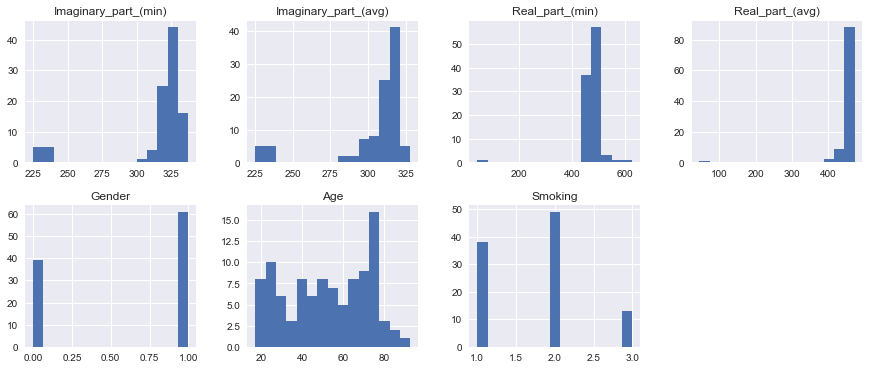

In [131]:
data.hist(bins=15, figsize=(15, 6), layout=(2, 4));